<a href="https://colab.research.google.com/github/RasandunSP/ML-Test/blob/main/Logistic_Regression_exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import io

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train_X.csv to train_X.csv


In [ ]:
X_train=pd.read_csv('train_X.csv')

In [ ]:
upload1=files.upload()

Saving test_X.csv to test_X.csv


In [ ]:
X_test=pd.read_csv('test_X.csv')

In [ ]:
upload2=files.upload()

Saving train_Y.csv to train_Y.csv


In [ ]:
Y_train=pd.read_csv('train_Y.csv')

In [ ]:
upload3=files.upload()

Saving test_Y.csv to test_Y.csv


In [ ]:
Y_test=pd.read_csv('test_Y.csv')

In [ ]:
X_train.head(3)

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1


In [ ]:
X_test.head(3)

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,1
2,2,2,0,62.0,0,0,9.6875,2


In [ ]:
Y_train.head(3)

,Id,Survived
0,0,0
1,1,1
2,2,1


In [ ]:
Y_test.head(3)

,Id,Survived
0,0,0
1,1,1
2,2,0


In [ ]:
X_train=X_train.drop("Id",axis=1)
X_test=X_test.drop("Id",axis=1)
Y_train=Y_train.drop("Id",axis=1)
Y_test=Y_test.drop("Id",axis=1)

In [ ]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,1


In [ ]:
X_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,2


In [ ]:
Y_train.head(3)

,Survived
0,0
1,1
2,1


In [ ]:
Y_test.head(3)

,Survived
0,0
1,1
2,0


In [ ]:
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
Y_test=Y_test.values

In [ ]:
X_train=X_train.T
Y_train=Y_train.reshape(1, X_train.shape[1])

X_test=X_test.T
Y_test=Y_test.reshape(1, X_test.shape[1])

In [ ]:
X_train.shape

(7, 891)

In [ ]:
X_test.shape

(7, 418)

In [ ]:
Y_train.shape

(1, 891)

In [ ]:
Y_test.shape

(1, 418)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def model(X,Y,lRate,Itr):

  #Observation
  m = X_train.shape[1]

  #features
  n = X_train.shape[0]

  #Calculate W and B
  W = np.zeros((n,1))
  B = 0

  Cost_list=[]

  for i in range(Itr):

    #Z = Y predict
    Z=np.dot(W.T,X)+B
    A=sigmoid(Z)

    #Cost function
    Cost=-(1/m) * np.sum(Y *np.log(A) + (1-Y) * np.log(1-A))

    dW = (1/m) * np.dot(A-Y,X.T)
    dB = (1/m) * np.sum(A-Y)

    W = W - lRate * dW.T
    B = B - lRate * dB

    Cost_list.append(Cost)

    if(i%(Itr/10)==0):
      print("Cost after  ",i, "Iteration is :",Cost)
  return W,B,Cost_list



In [ ]:
Itr=100000
lRate=0.0011
W,B,cost_list=model(X_train,Y_train,lRate=lRate,Itr=Itr)

Cost after   0 Iteration is : 0.6931471805599454
Cost after   10000 Iteration is : 0.5131349604463841
Cost after   20000 Iteration is : 0.4782658867330073
Cost after   30000 Iteration is : 0.46390856335720987
Cost after   40000 Iteration is : 0.4572818455089404
Cost after   50000 Iteration is : 0.45388848821007693
Cost after   60000 Iteration is : 0.45196128865702856
Cost after   70000 Iteration is : 0.4507459391060262
Cost after   80000 Iteration is : 0.44989958172104194
Cost after   90000 Iteration is : 0.44925842740077865


Accuracy of the model is :  92.10526315789474 %
Predictions of survival : [[1]]


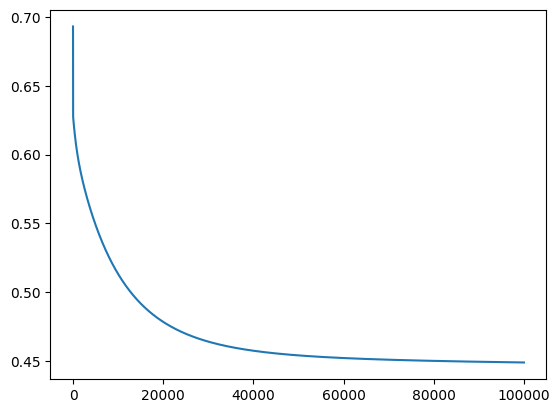

In [ ]:
#Plot the diagram
pl.plot(np.arange(Itr),cost_list)

# check the accuracy
def accuracy(X,Y,W,B):
    Z = np.dot(W.T,X) + B
    A= sigmoid(Z)

    A = A >0.5

    A = np.array(A,dtype = 'int64')
    acc = (1 - np.sum(np.absolute(A-Y))/Y.shape[1])*100

    print("Accuracy of the model is : ",acc,"%")

accuracy(X_test,Y_test,W,B)

#Prediction
def predict(X, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    predictions = (A > 0.5).astype(int)  # Convert to 0 or 1
    return predictions

#Predict using new data
new_data = np.array([[3,1,10,0,0,7,1]])
new_data = new_data.T
predictions = predict(new_data, W, B)
print("Predictions of survival :", predictions)